## Team **MacanMabur** (Binus University)

### Anggota:
- Andrew Widjaya
- Kevina Nugraha Eleeas
- Gabrielle Felicia Ariyanto
- Jocelyn Verna Siswanto

## 1. Import Library and Dataset

In [1]:
pip install kmodes

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import kmodes
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.metrics import davies_bouldin_score

In [3]:
warnings.filterwarnings("ignore")

In [57]:
df = pd.read_csv("dataset.csv",delimiter=';',decimal=',')

## 2. Data Understanding

In [58]:
df.shape

(11499, 11)

In [6]:
df.head()

,Nama,Gender,Tinggal_Dengan,Status_Kerja,Biaya,Tgl_Daftar_Kuliah,Alamat,UKM,Organisasi_Kampus,Lama_Kuliah,Fakultas
0,Abbey Butler,Pria,Kos,Belum,Beasiswa,2008,Tangerang,UKM_3,Ya,3.5,DKV
1,Abbey Carpenter,Wanita,NaN,Belum,NaN,2009,Bekasi,UKM_2,Tidak,4.0,FIKOM
2,Abbey Dubois,Wanita,NaN,Bekerja,Beasiswa,2008,Serang,UKM_4,Tidak,4.5,FIKOM
3,Abbey Gosling,Wanita,Orang Tua,Belum,Beasiswa,2009,Serang,UKM_1,Tidak,5.5,DKV
4,Abbey Logan,Wanita,Orang Tua,Bekerja,NaN,2009,Bekasi,Tidak,Ya,6.5,DKV


In [7]:
df.tail()

,Nama,Gender,Tinggal_Dengan,Status_Kerja,Biaya,Tgl_Daftar_Kuliah,Alamat,UKM,Organisasi_Kampus,Lama_Kuliah,Fakultas
11494,Carter Downing,Pria,Orang Tua,Belum,Orang Tua,2009,Tangerang,UKM_3,Ya,4.5,FIKOM
11495,Carter Driscoll,Wanita,NaN,Bekerja,Beasiswa,2008,Karawang,Tidak,Tidak,3.5,DKV
11496,Carter Drummond,Wanita,Kos,Bekerja,Beasiswa,2007,Bogor,UKM_2,Ya,5.0,FT
11497,Carter Dubois,Wanita,Kos,Bekerja,NaN,2007,Karawang,UKM_4,Tidak,4.5,DKV
11498,Carter Edley,Wanita,Kos,Belum,NaN,2008,Bekasi,UKM_2,Ya,4.5,FIKOM


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11499 entries, 0 to 11498
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Nama               11499 non-null  object 
 1   Gender             11499 non-null  object 
 2   Tinggal_Dengan     7517 non-null   object 
 3   Status_Kerja       11499 non-null  object 
 4   Biaya              7720 non-null   object 
 5   Tgl_Daftar_Kuliah  11499 non-null  int64  
 6   Alamat             11499 non-null  object 
 7   UKM                11499 non-null  object 
 8   Organisasi_Kampus  11499 non-null  object 
 9   Lama_Kuliah        11499 non-null  float64
 10  Fakultas           11499 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 988.3+ KB


- Terdapat missing values pada variabel Biaya dan Tinggal_Dengan
- Untuk variabel Tgl_Daftar_Kuliah dan Lama_Kuliah memiliki tipe data bukan object

In [9]:
df.describe() # lihat distribusi data

,Tgl_Daftar_Kuliah,Lama_Kuliah
count,11499.000000,11499.000000
mean,2007.996348,5.245804
std,0.816630,1.143226
min,2007.000000,3.500000
25%,2007.000000,4.500000
50%,2008.000000,5.000000
75%,2009.000000,6.000000
max,2009.000000,7.000000


## 3. Data Cleaning

In [10]:
df.duplicated().sum()

0

In [59]:
df.isnull().sum()

Nama                    0
Gender                  0
Tinggal_Dengan       3982
Status_Kerja            0
Biaya                3779
Tgl_Daftar_Kuliah       0
Alamat                  0
UKM                     0
Organisasi_Kampus       0
Lama_Kuliah             0
Fakultas                0
dtype: int64

In [60]:
# mengganti tipe data menjadi object
df['Tgl_Daftar_Kuliah'] = df['Tgl_Daftar_Kuliah'].astype('object')
df['Lama_Kuliah'] = df['Lama_Kuliah'].astype('object')

### Hapus Atribut yang Kurang Diperlukan

In [61]:
df.drop(['Nama'],axis=1,inplace=True)

### Hapus Data Duplikat 

In [62]:
df.duplicated().sum()

225

In [63]:
df.drop_duplicates(inplace=True)
df

,Gender,Tinggal_Dengan,Status_Kerja,Biaya,Tgl_Daftar_Kuliah,Alamat,UKM,Organisasi_Kampus,Lama_Kuliah,Fakultas
0,Pria,Kos,Belum,Beasiswa,2008,Tangerang,UKM_3,Ya,3.5,DKV
1,Wanita,NaN,Belum,NaN,2009,Bekasi,UKM_2,Tidak,4.0,FIKOM
2,Wanita,NaN,Bekerja,Beasiswa,2008,Serang,UKM_4,Tidak,4.5,FIKOM
3,Wanita,Orang Tua,Belum,Beasiswa,2009,Serang,UKM_1,Tidak,5.5,DKV
4,Wanita,Orang Tua,Bekerja,NaN,2009,Bekasi,Tidak,Ya,6.5,DKV
...,...,...,...,...,...,...,...,...,...,...
11494,Pria,Orang Tua,Belum,Orang Tua,2009,Tangerang,UKM_3,Ya,4.5,FIKOM
11495,Wanita,NaN,Bekerja,Beasiswa,2008,Karawang,Tidak,Tidak,3.5,DKV
11496,Wanita,Kos,Bekerja,Beasiswa,2007,Bogor,UKM_2,Ya,5.0,FT
11497,Wanita,Kos,Bekerja,NaN,2007,Karawang,UKM_4,Tidak,4.5,DKV


In [64]:
ds_cat_stats = pd.DataFrame(columns = ['column', 'values', 'values_count_incna', 'values_count_nona', 
                                       'num_miss', 'pct_miss'])
tmp = pd.DataFrame()

for c in df.columns:
    tmp['column'] = [c]
    tmp['values'] = [df[c].unique()]
    tmp['values_count_incna'] = len(list(df[c].unique()))
    tmp['values_count_nona'] = int(df[c].nunique())
    tmp['num_miss'] = df[c].isnull().sum()
    tmp['pct_miss'] = (df[c].isnull().sum()/ len(df)).round(3)*100
    ds_cat_stats = ds_cat_stats.append(tmp)
    
ds_cat_stats

,column,values,values_count_incna,values_count_nona,num_miss,pct_miss
0,Gender,"[Pria, Wanita]",2,2,0,0.0
0,Tinggal_Dengan,"[Kos, nan, Orang Tua]",3,2,3896,34.6
0,Status_Kerja,"[Belum, Bekerja]",2,2,0,0.0
0,Biaya,"[Beasiswa, nan, Orang Tua]",3,2,3711,32.9
0,Tgl_Daftar_Kuliah,"[2008, 2009, 2007]",3,3,0,0.0
0,Alamat,"[Tangerang, Bekasi, Serang, Bogor, Jakarta, Ka...",6,6,0,0.0
0,UKM,"[UKM_3, UKM_2, UKM_4, UKM_1, Tidak]",5,5,0,0.0
0,Organisasi_Kampus,"[Ya, Tidak]",2,2,0,0.0
0,Lama_Kuliah,"[3.5, 4.0, 4.5, 5.5, 6.5, 5.0, 6.0, 7.0]",8,8,0,0.0
0,Fakultas,"[DKV, FIKOM, FISIP, FTI, FT]",5,5,0,0.0


Persentase missing values pada variabel Biaya dan Tinggal_Dengan besarnya sekitar 30% dari data seluruhnya.

In [65]:
df2 = df.copy()
df2['Tinggal_Dengan'] = df2['Tinggal_Dengan'].fillna("Unknown")
df2['Biaya'] = df2['Biaya'].fillna("Unknown")

ds_cat_stats = pd.DataFrame(columns = ['column', 'values', 'values_count_incna', 'values_count_nona', 
                                       'num_miss', 'pct_miss'])
tmp = pd.DataFrame()

for c in df.columns:
    tmp['column'] = [c]
    tmp['values'] = [df2[c].unique()]
    tmp['values_count_incna'] = len(list(df2[c].unique()))
    tmp['values_count_nona'] = int(df2[c].nunique())
    tmp['num_miss'] = df2[c].isnull().sum()
    tmp['pct_miss'] = (df2[c].isnull().sum()/ len(df2)).round(3)*100
    ds_cat_stats = ds_cat_stats.append(tmp)
    
ds_cat_stats

,column,values,values_count_incna,values_count_nona,num_miss,pct_miss
0,Gender,"[Pria, Wanita]",2,2,0,0.0
0,Tinggal_Dengan,"[Kos, Unknown, Orang Tua]",3,3,0,0.0
0,Status_Kerja,"[Belum, Bekerja]",2,2,0,0.0
0,Biaya,"[Beasiswa, Unknown, Orang Tua]",3,3,0,0.0
0,Tgl_Daftar_Kuliah,"[2008, 2009, 2007]",3,3,0,0.0
0,Alamat,"[Tangerang, Bekasi, Serang, Bogor, Jakarta, Ka...",6,6,0,0.0
0,UKM,"[UKM_3, UKM_2, UKM_4, UKM_1, Tidak]",5,5,0,0.0
0,Organisasi_Kampus,"[Ya, Tidak]",2,2,0,0.0
0,Lama_Kuliah,"[3.5, 4.0, 4.5, 5.5, 6.5, 5.0, 6.0, 7.0]",8,8,0,0.0
0,Fakultas,"[DKV, FIKOM, FISIP, FTI, FT]",5,5,0,0.0


Missing values akan diimputasi dengan kata 'Unknown'.

In [66]:
# hapus data duplikasi pada df2
df2.drop_duplicates(inplace=True)
df2

,Gender,Tinggal_Dengan,Status_Kerja,Biaya,Tgl_Daftar_Kuliah,Alamat,UKM,Organisasi_Kampus,Lama_Kuliah,Fakultas
0,Pria,Kos,Belum,Beasiswa,2008,Tangerang,UKM_3,Ya,3.5,DKV
1,Wanita,Unknown,Belum,Unknown,2009,Bekasi,UKM_2,Tidak,4.0,FIKOM
2,Wanita,Unknown,Bekerja,Beasiswa,2008,Serang,UKM_4,Tidak,4.5,FIKOM
3,Wanita,Orang Tua,Belum,Beasiswa,2009,Serang,UKM_1,Tidak,5.5,DKV
4,Wanita,Orang Tua,Bekerja,Unknown,2009,Bekasi,Tidak,Ya,6.5,DKV
...,...,...,...,...,...,...,...,...,...,...
11494,Pria,Orang Tua,Belum,Orang Tua,2009,Tangerang,UKM_3,Ya,4.5,FIKOM
11495,Wanita,Unknown,Bekerja,Beasiswa,2008,Karawang,Tidak,Tidak,3.5,DKV
11496,Wanita,Kos,Bekerja,Beasiswa,2007,Bogor,UKM_2,Ya,5.0,FT
11497,Wanita,Kos,Bekerja,Unknown,2007,Karawang,UKM_4,Tidak,4.5,DKV


## 4. Data Pre-processing

### Label Encoding

In [67]:
from sklearn.preprocessing import LabelEncoder

lists = ['Gender','Tinggal_Dengan','Status_Kerja','Biaya','Tgl_Daftar_Kuliah','Alamat','UKM','Organisasi_Kampus','Lama_Kuliah','Fakultas']
df3 = df2.copy()

label_encoder = LabelEncoder()
for i in lists:
    df3[i] = label_encoder.fit_transform(df2[i])
df3

,Gender,Tinggal_Dengan,Status_Kerja,Biaya,Tgl_Daftar_Kuliah,Alamat,UKM,Organisasi_Kampus,Lama_Kuliah,Fakultas
0,0,0,1,0,1,5,3,1,0,0
1,1,2,1,2,2,0,2,0,1,1
2,1,2,0,0,1,4,4,0,2,1
3,1,1,1,0,2,4,1,0,4,0
4,1,1,0,2,2,0,0,1,6,0
...,...,...,...,...,...,...,...,...,...,...
11494,0,1,1,1,2,5,3,1,2,1
11495,1,2,0,0,1,3,0,0,0,0
11496,1,0,0,0,0,1,2,1,3,3
11497,1,0,0,2,0,3,4,0,2,0


## 5. Clustering

### Menerapkan Algoritma K-Modes

In [69]:
from kmodes.kmodes import KModes

km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1) # jumlah kluster ditetapkan sebanyak 2
fitClusters_cao = km_cao.fit_predict(df2)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 65191.0


In [70]:
fitClusters_cao

array([1, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [71]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = df2.columns

clusterCentroidsDf

,Gender,Tinggal_Dengan,Status_Kerja,Biaya,Tgl_Daftar_Kuliah,Alamat,UKM,Organisasi_Kampus,Lama_Kuliah,Fakultas
0,Wanita,Unknown,Bekerja,Beasiswa,2007,Tangerang,UKM_2,Tidak,4.5,FT
1,Pria,Orang Tua,Belum,Orang Tua,2009,Bogor,UKM_3,Ya,5.0,FTI


### Menerapkan *Elbow Method* untuk menentukan jumlah *cluster* yang tepat

In [72]:
cost = []
for num_clusters in list(range(1,10)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    labels = kmode.fit_predict(df2)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 76299.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 65191.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 60992.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 57711.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 56058.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 54559.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 53221.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration:

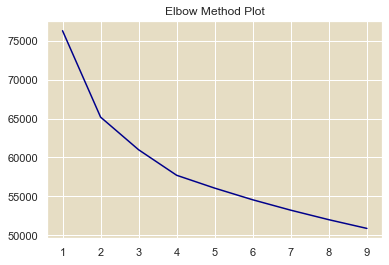

In [73]:
y = np.array([i for i in range(1,10,1)])
plt.plot(y,cost, color = 'darkblue')
sns.set(rc={'axes.facecolor':'#E6DDC4', 'figure.facecolor':'white'})
plt.title('Elbow Method Plot')
plt.show()

Berdasarkan lekukan garis pada grafik Elbow Method, jumlah klaster yang optimal adalah 4

### Menerapkan *CALINKSI-HARABASZ Method* untuk menentukan jumlah *cluster* yang tepat

In [74]:
from sklearn.metrics import calinski_harabasz_score

ch_result = []
for num_clusters in list(range(2,6)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    labels = kmode.fit_predict(df3)
    ch_index = calinski_harabasz_score(df3, labels)
    ch_result.append(ch_index)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 65191.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 60992.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 57711.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 56058.0


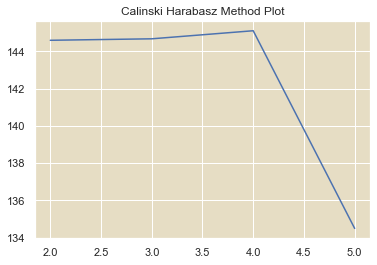

In [75]:
y = np.array([i for i in range(2,6,1)])
plt.plot(y, ch_result)
sns.set(rc={'axes.facecolor':'#E6DDC4', 'figure.facecolor':'white'})
plt.title('Calinski Harabasz Method Plot')
plt.show()

Berdasarkan grafik Calinski Harabasz, jumlah klaster yang optimal juga 4. Maka dari itu, kita akan menetapkan jumlah klaster sebanyak 4 saat melakukan clustering.

### Melakukan Clustering dengan 4 Klaster

In [76]:
km_cao = KModes(n_clusters=4, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df2)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 57711.0


In [77]:
fitClusters_cao

array([3, 0, 0, ..., 0, 0, 3], dtype=uint16)

In [80]:
df2 = df2.reset_index()

In [81]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([df2, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

clustersDf

,cluster_predicted
0,3
1,0
2,0
3,3
4,3
...,...
11269,1
11270,0
11271,0
11272,0


In [82]:
combinedDf.head()

,Gender,Tinggal_Dengan,Status_Kerja,Biaya,Tgl_Daftar_Kuliah,Alamat,UKM,Organisasi_Kampus,Lama_Kuliah,Fakultas,cluster_predicted
0,Pria,Kos,Belum,Beasiswa,2008,Tangerang,UKM_3,Ya,3.5,DKV,3
1,Wanita,Unknown,Belum,Unknown,2009,Bekasi,UKM_2,Tidak,4.0,FIKOM,0
2,Wanita,Unknown,Bekerja,Beasiswa,2008,Serang,UKM_4,Tidak,4.5,FIKOM,0
3,Wanita,Orang Tua,Belum,Beasiswa,2009,Serang,UKM_1,Tidak,5.5,DKV,3
4,Wanita,Orang Tua,Bekerja,Unknown,2009,Bekasi,Tidak,Ya,6.5,DKV,3


Berikut merupakan hasil kluster untuk tiap data point.

In [83]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]
cluster_2 = combinedDf[combinedDf['cluster_predicted'] == 2]
cluster_3 = combinedDf[combinedDf['cluster_predicted'] == 3]

### Klaster 0

In [84]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3931 entries, 1 to 11272
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Gender             3931 non-null   object
 1   Tinggal_Dengan     3931 non-null   object
 2   Status_Kerja       3931 non-null   object
 3   Biaya              3931 non-null   object
 4   Tgl_Daftar_Kuliah  3931 non-null   object
 5   Alamat             3931 non-null   object
 6   UKM                3931 non-null   object
 7   Organisasi_Kampus  3931 non-null   object
 8   Lama_Kuliah        3931 non-null   object
 9   Fakultas           3931 non-null   object
 10  cluster_predicted  3931 non-null   uint16
dtypes: object(10), uint16(1)
memory usage: 345.5+ KB


### Klaster 1

In [85]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3141 entries, 7 to 11269
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Gender             3141 non-null   object
 1   Tinggal_Dengan     3141 non-null   object
 2   Status_Kerja       3141 non-null   object
 3   Biaya              3141 non-null   object
 4   Tgl_Daftar_Kuliah  3141 non-null   object
 5   Alamat             3141 non-null   object
 6   UKM                3141 non-null   object
 7   Organisasi_Kampus  3141 non-null   object
 8   Lama_Kuliah        3141 non-null   object
 9   Fakultas           3141 non-null   object
 10  cluster_predicted  3141 non-null   uint16
dtypes: object(10), uint16(1)
memory usage: 276.1+ KB


### Klaster 2

In [86]:
cluster_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2251 entries, 5 to 11252
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Gender             2251 non-null   object
 1   Tinggal_Dengan     2251 non-null   object
 2   Status_Kerja       2251 non-null   object
 3   Biaya              2251 non-null   object
 4   Tgl_Daftar_Kuliah  2251 non-null   object
 5   Alamat             2251 non-null   object
 6   UKM                2251 non-null   object
 7   Organisasi_Kampus  2251 non-null   object
 8   Lama_Kuliah        2251 non-null   object
 9   Fakultas           2251 non-null   object
 10  cluster_predicted  2251 non-null   uint16
dtypes: object(10), uint16(1)
memory usage: 197.8+ KB


### Klaster 3

In [87]:
cluster_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1951 entries, 0 to 11273
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Gender             1951 non-null   object
 1   Tinggal_Dengan     1951 non-null   object
 2   Status_Kerja       1951 non-null   object
 3   Biaya              1951 non-null   object
 4   Tgl_Daftar_Kuliah  1951 non-null   object
 5   Alamat             1951 non-null   object
 6   UKM                1951 non-null   object
 7   Organisasi_Kampus  1951 non-null   object
 8   Lama_Kuliah        1951 non-null   object
 9   Fakultas           1951 non-null   object
 10  cluster_predicted  1951 non-null   uint16
dtypes: object(10), uint16(1)
memory usage: 171.5+ KB


### Visualisasi Hasil Klasterisasi Tiap Atribut

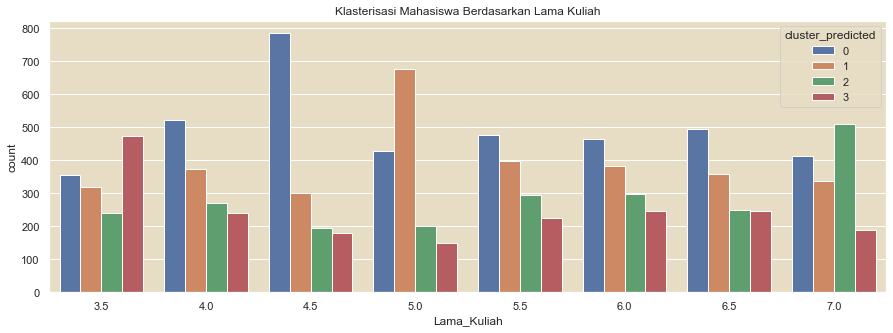

In [88]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['Lama_Kuliah'],hue=combinedDf['cluster_predicted']).set(title='Klasterisasi Mahasiswa Berdasarkan Lama Kuliah')
plt.show()

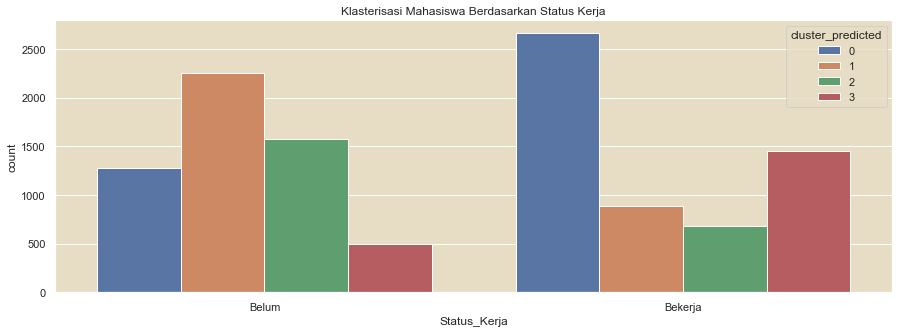

In [89]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['Status_Kerja'],hue=combinedDf['cluster_predicted']).set(title='Klasterisasi Mahasiswa Berdasarkan Status Kerja')
plt.show()

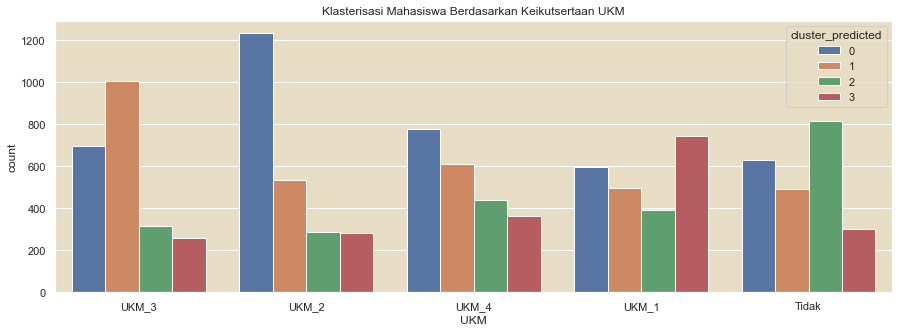

In [90]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['UKM'],hue=combinedDf['cluster_predicted']).set(title='Klasterisasi Mahasiswa Berdasarkan Keikutsertaan UKM')
plt.show()

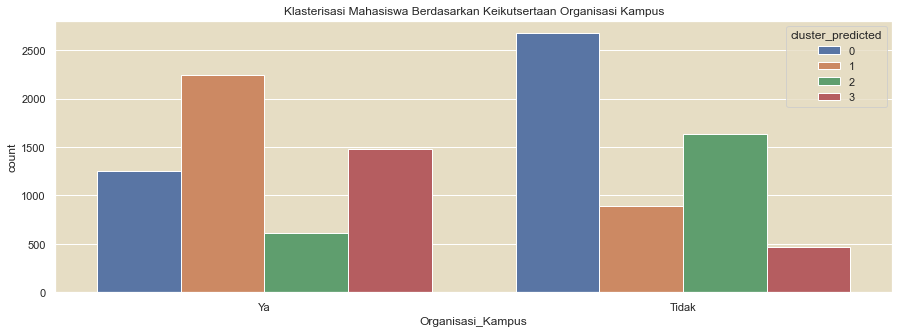

In [91]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['Organisasi_Kampus'],hue=combinedDf['cluster_predicted']).set(title='Klasterisasi Mahasiswa Berdasarkan Keikutsertaan Organisasi Kampus')
plt.show()

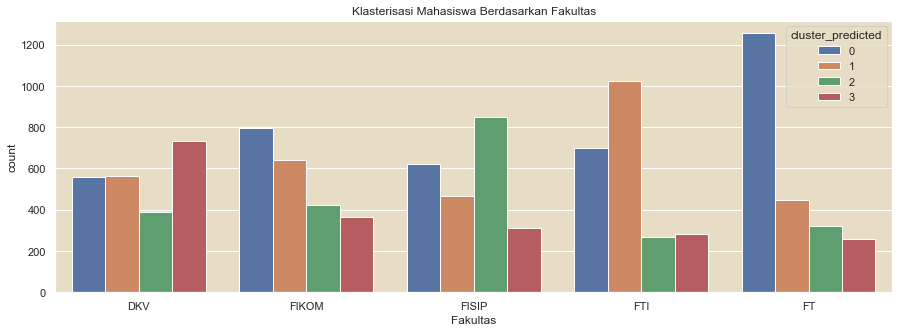

In [92]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['Fakultas'],hue=combinedDf['cluster_predicted']).set(title='Klasterisasi Mahasiswa Berdasarkan Fakultas')
plt.show()

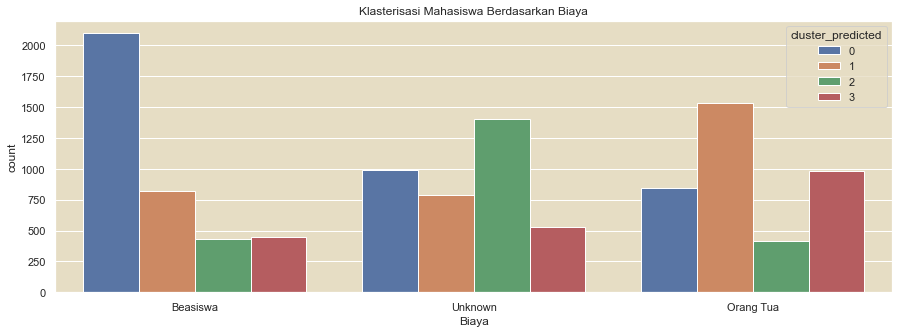

In [93]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['Biaya'],hue=combinedDf['cluster_predicted']).set(title='Klasterisasi Mahasiswa Berdasarkan Biaya')
plt.show()

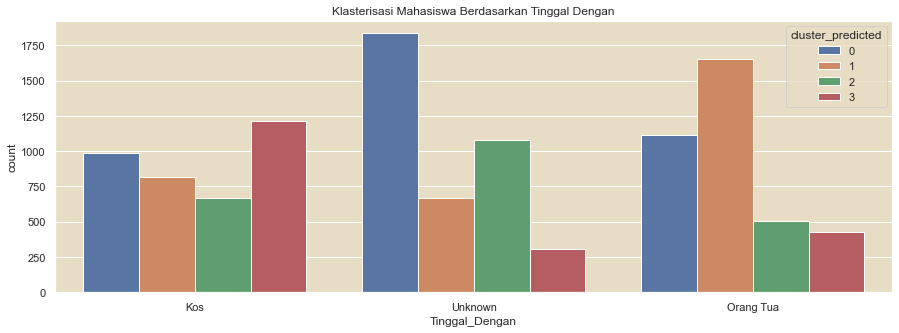

In [94]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['Tinggal_Dengan'],hue=combinedDf['cluster_predicted']).set(title='Klasterisasi Mahasiswa Berdasarkan Tinggal Dengan')
plt.show()

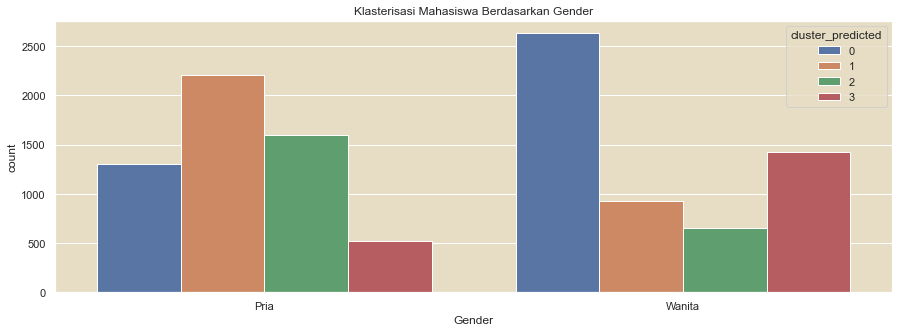

In [95]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['Gender'],hue=combinedDf['cluster_predicted']).set(title='Klasterisasi Mahasiswa Berdasarkan Gender')
plt.show()

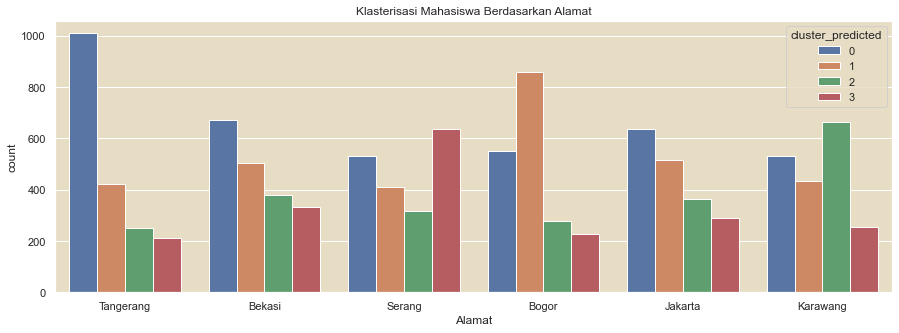

In [96]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['Alamat'],hue=combinedDf['cluster_predicted']).set(title='Klasterisasi Mahasiswa Berdasarkan Alamat')
plt.show()

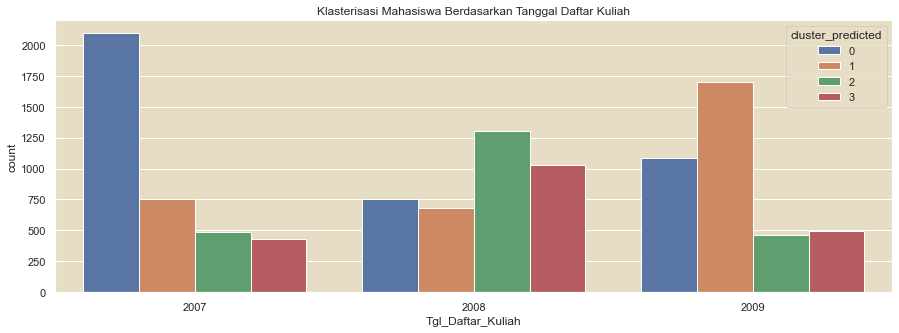

In [97]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['Tgl_Daftar_Kuliah'],hue=combinedDf['cluster_predicted']).set(title='Klasterisasi Mahasiswa Berdasarkan Tanggal Daftar Kuliah')
plt.show()

**Hasil insight pada visualisasi diatas dapat dilihat pada file report (Rencana_Akademik_Paper.pdf)**